In [1]:
import pandas as pd
import numpy as np

# Load processed CSV file
input_csv = "./output/temporal_analysis_data.csv"
df = pd.read_csv(input_csv)

# Ensure required columns exist
required_columns = ["Location", "Area No.", "Yearly Average", "Year"]
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"❌ Missing required column: {col}")

# **Group by Location & Area No. to analyze trends**
grouped = df.groupby(["Location", "Area No."])["Yearly Average"].agg(
    min_level="min",
    max_level="max",
    avg_level="mean",
    change_2021_2024=lambda x: x.iloc[-1] - x.iloc[0] if len(x) == 4 else np.nan
).reset_index()

# Save insights to CSV
output_csv = "./output/location_based_groundwater_insights.csv"
grouped.to_csv(output_csv, index=False)

# **Print Summary**
print("\n📊 Groundwater Level Insights by Location:")
print(grouped.head())

print(f"\n✅ Insights saved to: {output_csv}")



📊 Groundwater Level Insights by Location:
                         Location Area No.  min_level  max_level  avg_level  \
0                 Adampakkam Part      XII   2.408167   3.953333   3.022292   
1  Adampakkam Part / Balaji Nagar      XII   3.488500   4.280000   3.879938   
2                      Adyar East     XIII   2.216667   3.434750   2.722146   
3                      Adyar West     XIII   2.570333   4.468750   3.214250   
4                  Agaram (North)       VI   2.111667   3.738583   2.632292   

   change_2021_2024  
0          1.105250  
1          0.314083  
2         -1.218083  
3         -1.712083  
4         -1.215250  

✅ Insights saved to: ./output/location_based_groundwater_insights.csv


C:\Users\rumma\AppData\Local\Temp\ipykernel_21288\2566235437.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


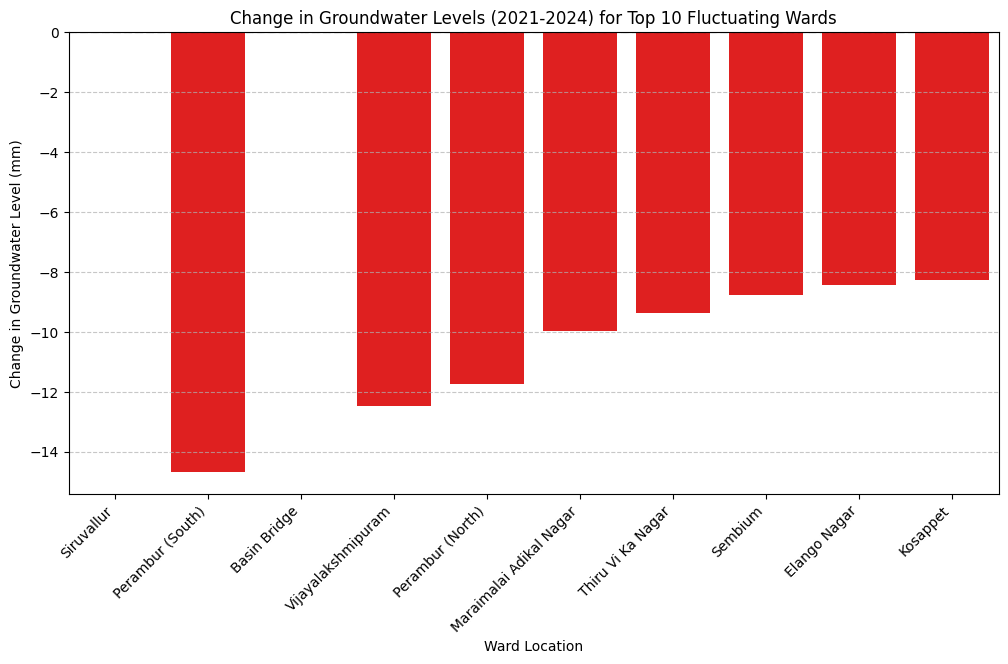

📊 Groundwater level change visualization saved to: ./output/Top_10_Wards_Groundwater_Change_2021_2024.png


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load location-based insights
insights_csv = "./output/location_based_groundwater_insights.csv"
df_insights = pd.read_csv(insights_csv)

# Select top 10 wards with the highest fluctuations
df_insights["Fluctuation"] = df_insights["max_level"] - df_insights["min_level"]
df_top_fluctuations = df_insights.sort_values(by="Fluctuation", ascending=False).head(10)

# **Bar Plot - Change in Groundwater Levels (2021 vs 2024)**
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Location",
    y="change_2021_2024",
    data=df_top_fluctuations,
    palette=["red" if x < 0 else "green" for x in df_top_fluctuations["change_2021_2024"]]
)

plt.xlabel("Ward Location")
plt.ylabel("Change in Groundwater Level (mm)")
plt.title("Change in Groundwater Levels (2021-2024) for Top 10 Fluctuating Wards")
plt.xticks(rotation=45, ha="right")
plt.axhline(0, color="black", linestyle="--")  # Add reference line at 0
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save and Show Plot
output_path = "./output/Top_10_Wards_Groundwater_Change_2021_2024.png"
plt.savefig(output_path, bbox_inches="tight")
plt.show()

print(f"📊 Groundwater level change visualization saved to: {output_path}")


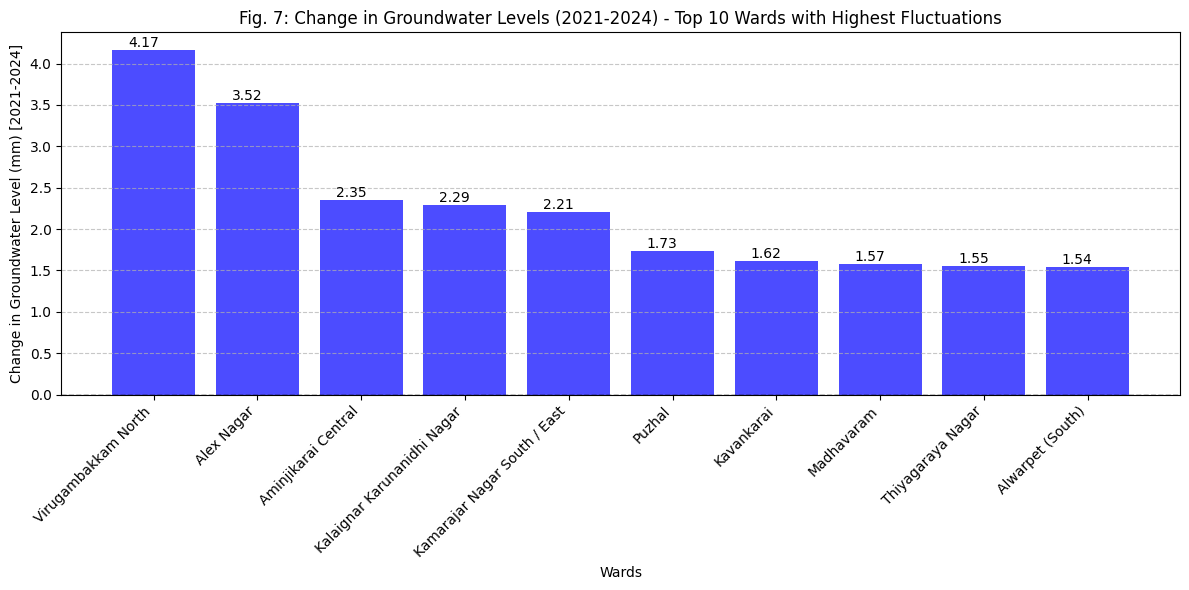


🔍 Top 10 Wards with Highest Groundwater Level Fluctuations (2021-2024):
                         Location Area No.  change_2021_2024
182           Virugambakkam North        X          4.169417
8                      Alex Nagar      III          3.518083
10            Aminjikarai Central     VIII          2.352833
58    Kalaignar Karunanidhi Nagar        X          2.289250
62   Kamarajar Nagar South / East        X          2.211667
132                        Puzhal      III          1.730000
67                     Kavankarai      III          1.618083
82                     Madhavaram      III          1.572000
164             Thiyagaraya Nagar        X          1.554500
9                Alwarpet (South)       IX          1.539833

✅ Top 10 fluctuation wards saved to: ward_level_comp/top_10_fluctuation_wards.csv


In [3]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# Load the processed data
input_csv = "./output/location_based_groundwater_insights.csv"
df = pd.read_csv(input_csv)

# Ensure necessary columns exist
required_columns = ["Location", "Area No.", "change_2021_2024"]
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"❌ Missing required column: {col}")

# Select the **Top 10 Wards with Highest Groundwater Fluctuations**
top_fluctuation_wards = df.nlargest(10, "change_2021_2024")

# Ensure output directory exists
output_dir = "ward_level_comp"
os.makedirs(output_dir, exist_ok=True)

# **Step 1: Visualization - Change in Groundwater Levels (2021-2024)**
plt.figure(figsize=(12, 6))
bars = plt.bar(
    top_fluctuation_wards["Location"],
    top_fluctuation_wards["change_2021_2024"],
    color=["red" if val < 0 else "blue" for val in top_fluctuation_wards["change_2021_2024"]],
    alpha=0.7
)

# Annotate values on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')

# Labels & Title
plt.title("Fig. 7: Change in Groundwater Levels (2021-2024) - Top 10 Wards with Highest Fluctuations")
plt.xlabel("Wards")
plt.ylabel("Change in Groundwater Level (mm) [2021-2024]")
plt.xticks(rotation=45, ha="right")
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Baseline at zero
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save figure
output_path = os.path.join(output_dir, "Fig_7_Change_in_Groundwater_Levels_2021_2024.png")
plt.tight_layout()
plt.savefig(output_path)
plt.show()

# **Step 2: Display Insights for Top 10 Wards**
print("\n🔍 Top 10 Wards with Highest Groundwater Level Fluctuations (2021-2024):")
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
print(top_fluctuation_wards[["Location", "Area No.", "change_2021_2024"]])

# Reset Pandas display options
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")

# Save results
top_fluctuation_wards.to_csv(os.path.join(output_dir, "top_10_fluctuation_wards.csv"), index=False)

print(f"\n✅ Top 10 fluctuation wards saved to: {output_dir}/top_10_fluctuation_wards.csv")
